In [40]:
import numpy as np
import matplotlib.pyplot as plt

$\large \textbf{Excercise 2:} \ $

$\text{The function is:} \ \  f(x)=512(x_2-x_1^2)^2+(4-x_1)^2 $

$\text{Question 1}$ \\ [R] Can you design a suitable diagonal matrix Dk for gradient descent algorithm with scaling to solve minx q(x).
If you can come up with a suitable choice of Dk, use it in the implementation of Algorithm 1 (with backtracking
line search) to find the minimizer of q(x) with starting point x0 = (8, 8) and τ = 10−5. Consider α0 = 1, ρ =
0.5, γ = 0.5 for backtracking line search. Comment on your observations when compared to the gradient descent
(without scaling) with backtracking line search. If you cannot find a suitable choice of Dk, explain clearly the
reasons.

$\large \textbf{Answer:}\text{as we derived in last excercise that our } D_k \text{ is :}$ 

 $D_k=[(\frac{\delta^2f}{\delta x_1^2})^{-1},(\frac{\delta^2f}{\delta x_2^2})^{-1} , (\frac{\delta^2f}{\delta x_3^2})^{-1}, ...............(\frac{\delta^2f}{\delta x_n^2})^{-1}] $

$\text{So according to question Dk is:} \\ $ $  D_k= \begin{bmatrix}
(2+6144*x_1^2-2048*x_2)^{-1} & 0\\
0 & (1024)^{-1}
\end{bmatrix}$

$\text{our hessian matrix can be written as:} \ $

$H_x=\nabla^2f(x)=$\begin{bmatrix}
(2+6144*x_1^2-2048*x_2)^{-1} & 0\\
0 & (1024)^{-1}
\end{bmatrix}$

In [41]:
def evalf(x):
  assert type(x) is np.ndarray and len(x)==2
  return 512*(x[1]-(x[0]**2))**2+(4-x[0])**2

In [42]:
def evalg(x):
  assert type(x) is np.ndarray and len(x)==2
  x1_grad=2048*x[0]**3-2048*x[0]*x[1]-8+2*x[0]
  x2_grad=1024*x[1]-1024*(x[0]**2)
  return np.array([x1_grad,x2_grad],dtype='float64')

In [43]:
def evalh(x):
  assert type(x) is np.ndarray and len(x)==2
  df_dxx=6144*(x[0]**2)-2048*x[1]+2
  df_dyx=-2048*x[0]
  df_dyy=1024
  return np.array([df_dxx,df_dyx,df_dyx,df_dyy],dtype='float64').reshape(2,2)



In [44]:
evalh(np.array([8,8]))

array([[376834., -16384.],
       [-16384.,   1024.]])

In [45]:
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  Hes=evalh(x)
  D_k=np.array([1/Hes[0,0],0,0,1/Hes[1,1]]).reshape(2,2)
  return D_k

In [46]:
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0.
  alpha = alpha_start
  p=-gradf
  while evalf(x+alpha*p)> evalf(x)+gamma*alpha*(np.dot(evalg(x).transpose(),p)):
    alpha=alpha*rho
  return alpha

In [47]:
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  eigen_values=np.linalg.eig(A)[0]
  return max(eigen_values)/min(eigen_values)

In [48]:
def compute_steplength_backtracking_scaled_direction(x, gradf, direction, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(direction) is np.ndarray and len(direction) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0.
  alpha = alpha_start
  p=-gradf
  while evalf(x-alpha*np.matmul(direction,gradf))> evalf(x)-gamma*alpha*(np.matmul(evalg(x).transpose(),np.matmul(direction,gradf))):
    alpha=alpha*rho
  return alpha 
  

In [49]:
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [50]:
def find_q(d_k,hes):
  viv=np.matmul(scipy.linalg.sqrtm(d_k).T,np.matmul(hes,scipy.linalg.sqrtm(d_k)))
  return viv

In [51]:
#complete the code for gradient descent to find the minimizer
def find_minimizer_gd(start_x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  
  A = np.array([1500,2,2,1]).reshape(2,2)
  x = start_x
  g_x = evalg(x)
  cond=[]
  cond_hess=[]

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A,x) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    cond_hess.append(find_condition_number(evalh(x)))

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x,k,cond_hess
  


In [52]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling(start_x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  A = np.array([[1500, 2],[2,1]])
  x = start_x
  g_x = evalg(x)
  d_k=compute_D_k(x)
  condition=find_condition_number(find_q(d_k,evalh(x)))
  condition1=find_condition_number(evalh(x))
  cond1=[]
  cond2=[]
  cond1.append(condition)
  cond2.append(condition1)
  


  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start=args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
        #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x,g_x,d_k, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength      
     # raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1   
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,np.matmul(d_k,evalg(x)))) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    d_k=compute_D_k(x)
    cond1.append(condition)
    cond2.append(condition1)
    

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', dir, ' gradient norm:', np.linalg.norm(g_x))
  return x,k,cond1,cond2

  #Complete the code   

In [ ]:
my_start_x=np.array([8,8])
my_tol=1e-5
alpha=1.0
rho=0.5
gamma=0.5
opt_x_bls,number_of_iter_bls,condition_no_hess=find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha,rho,gamma)
print('minimizer is :',opt_x_bls)
print('number of iterations taken :',number_of_iter_bls)
print('minimum value of function:',evalf(opt_x_bls))

print('\n-------------------------------------------------------------------\n')
print('Backtracking using scalling')
opt_x_bls,number_of_iter_blscondition_no_with_sc,condition_no_Q,condition_no_hes_scl=find_minimizer_gdscaling(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha,rho,gamma)
print('minimizer is :',opt_x_bls)
print('number of iterations taken :',number_of_iter_bls)
print('minimum value of function:',evalf(opt_x_bls))

Params for Backtracking LS: alpha start: 1.0 rho: 0.5  gamma: 0.5


$\large \textbf{Observations:} $ Here we can see that number of iterations taken to reach to optimal condition for both conditions are almost equal so in this problem we see that scalling in this way doesn't give us any benefit to use. 

$\large \textbf{Question:}$[R] Based on our discussion on condition number and the derivation of the gradient descent scheme with
scaling, can you identify and write down the matrix Q whose condition number needs to be analyzed in the
new gradient descent scheme with scaling with Dk = (∇2f(xk))−1?

$\large \textbf{Answer:} \text{as we know that} \  \mathbf{Q} = \mathbf{(D^k)}^{\frac{1}{2}}H^k \mathbf{(D^k)}^{\frac{1}{2}}  $

where $H^k$ is Hassian matrix of a function for $k^{th}$ iteration

$\large \textbf{Question:} $

[R] With starting point x0 = (8, 8) and a stopping tolerance τ = 10−5, find the number of iterations taken
by the gradient descent algorithm (without scaling) with backtracking line search, gradient descent algorithm
(with scaling) with backtracking line search. For backtracking line search, use α0 = 1, ρ = 0.5, γ = 0.5.
Note the minimizer and minimum objective function value in each case. Comment on your observations.
Also note the condition number of the Hessian matrix involved in the gradient descent algorithm (without
scaling) with backtracking line search and condition number of the matrix Q involved in the gradient descent
algorithm (with scaling) with backtracking line search in each iteration. Prepare a plot depicting the behavior
of condition numbers in both algorithms against iterations. Use different colors and legend to distinguish the
methods. Comment on your observations.

$ \large \textbf{Answer:}$ As we can see that we get minimizer of function is obtained approximately (4,16) and minimum function value is zero obtained.
 

In [ ]:
plt.plot(condition_no_hess,label='condition number of hessian matrix with respect to iterations without scalling')
plt.xlabel('iterations')
plt.ylabel('condition number')
plt.legend(bbox_to_anchor=(1.50,0.5))
plt.show()

$\text{as we can see that as soon as iterations occures condition number of hessian matrix also increases which clearly indicates that illness of problem increases.}$

In [ ]:
plt.plot(condition_no_Q,label='condition number of Q matrix with respect to iterations with scalling')
plt.xlabel('iterations')
plt.ylabel('condition number')
plt.legend(bbox_to_anchor=(1.50,0.5))
plt.show()

In [ ]:
def d_k_newton(x):
  assert type(x) is np.ndarray and len(x)==2
  return np.linalg.inv(evalh(x))

In [57]:
import scipy.linalg

In [55]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling_newton(start_x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  A = np.array([[1500, 2],[2,1]])
  x = start_x
  g_x = evalg(x)
  hes=evalh(x)
  d_k=d_k_newton(x)
  condition=find_condition_number(find_q(d_k,evalh(x)))
  condition_num=[]
  condition_num.append(condition)
  


  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start=args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
        #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x,g_x,d_k, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength      
     # raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1   
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,np.matmul(d_k,evalg(x)))) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    d_k=d_k_newton(x)
    condition_num.append(find_condition_number(find_q(d_k,evalh(x))))

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', dir, ' gradient norm:', np.linalg.norm(g_x))
  return x,k,condition_num

  #Complete the code   

In [58]:
opt_x_bls,number_of_iter_bls,con=find_minimizer_gdscaling_newton(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha,rho,gamma)
print('minimizer is :',opt_x_bls)
print('number of iterations taken :',number_of_iter_bls)
print('minimum value of function:',evalf(opt_x_bls))

minimizer is : [ 4. 16.]
number of iterations taken : 48
minimum value of function: 9.49387788546246e-25


In [ ]:
print(con)

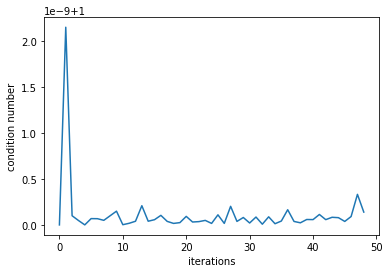

In [59]:
plt.plot(con,label='condition number')
plt.xlabel('iterations')
plt.ylabel('condition number')
plt.show()

$\text{As above diagram indicates that as soon as iterations occures condition number of our matrix Q decreases }$